In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
# DATA
x = pd.read_csv("GSE83139_tbx-v-f-norm-ntv-cpms.csv", sep="\t")
fDat = x.iloc[:, :7]
x = x.drop(columns=x.columns[:7])
x.index = fDat['transcript']
x.index = np.where(fDat['gene'].notna(), fDat['gene'], x.index)
fDat.index = x.index

In [4]:
fDat

,chr,start,end,strand,transcript,part,gene
GCG,chr2,162999385,163008914,*,NM_002054,transcript,GCG
MALAT1,chr11,65265233,65273939,*,NR_002819,transcript,MALAT1
REG1A,chr2,79347584,79350545,*,NM_002909,transcript,REG1A
PPY,chr17,42018172,42019833,*,NM_002722,transcript,PPY
SST,chr3,187386694,187388201,*,NM_001048,transcript,SST
...,...,...,...,...,...,...,...
LOC286094,chr8,136246374,136311962,*,NR_026706,transcript,LOC286094
CNR2,chr1,24200460,24239817,*,NM_001841,transcript,CNR2
RSPO2,chr8,108911544,109095913,*,NM_178565,transcript,RSPO2
OR5A1,chr11,59210642,59211589,*,NM_001004728,transcript,OR5A1


In [5]:
# Transpose x for compatibility with AnnData format (genes as rows, cells as columns)
x = x.T

# ANNOTATIONS
def parse_annotation(file_path, rows):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    selected_lines = [lines[row].strip() for row in rows]  # Lấy các dòng chỉ định và loại bỏ khoảng trắng
    ann = [line.split("\t") for line in selected_lines]  # Tách dòng dựa trên "\t"
    return ann

ANN1 = parse_annotation("GSE83139-GPL11154_series_matrix.txt", rows=[37, 47, 48, 49])
ANN2 = parse_annotation("GSE83139-GPL16791_series_matrix.txt", rows=[37, 47, 48, 49])

In [6]:
# Extract metadata
qualities = []
for i in range(len(ANN1)):
    thing1 = np.array([entry.split(" ") for entry in ANN1[i][1:]], dtype=str)
    thing2 = np.array([entry.split(" ") for entry in ANN2[i][1:]], dtype=str)
    # Kết hợp và loại bỏ các ký tự dư thừa
    combined = np.concatenate([thing1[:, 1], thing2[:, 1]])
    cleaned = np.char.strip(combined, '"')  # Loại bỏ dấu " từ các phần tử
    qualities.append(cleaned)


pDat = pd.DataFrame({
    'age': qualities[1],
    'disease': qualities[2],
    'cell_type1': qualities[3]
})
pDat.index = ["reads." + q for q in qualities[0]]

In [7]:
pDat

,age,disease,cell_type1
reads.12730,adult,control,dropped
reads.12731,adult,control,dropped
reads.12732,adult,control,alpha
reads.12733,adult,control,alpha
reads.12734,adult,control,dropped
...,...,...,...
reads.29499,adult,T1D,duct
reads.29500,adult,T1D,duct
reads.29501,adult,T1D,beta
reads.29502,adult,T1D,dropped


In [9]:
x

,GCG,MALAT1,REG1A,PPY,SST,TTR,SPP1,PRSS1,INS,SERPINA1,...,SMYD1,ZDHHC19,OR2S2,MIR31,SLCO6A1,LOC286094,CNR2,RSPO2,OR5A1,ASB2
reads.12730,253395.514513,16790.371790,75445.994543,0.144511,4.154782,22812.834938,2.871366,9269.274462,0.144511,249.096223,...,0.144511,0.144511,0.144511,0.144511,0.144511,0.144511,0.144511,0.144511,0.144511,0.144511
reads.12731,85740.857153,51819.625853,19.392418,0.164907,191100.806281,14069.638381,12.833189,1.461928,0.957269,0.608785,...,0.164907,0.164907,0.164907,0.164907,0.164907,0.164907,0.164907,0.164907,0.164907,0.164907
reads.12732,261497.816751,50224.300786,11.706527,6.966857,3.273362,72442.804780,52.605820,1.837217,5.947697,450.885218,...,0.100256,0.100256,0.100256,0.100256,0.100256,0.100256,0.100256,0.100256,0.100256,0.100256
reads.12733,216922.768214,31687.972907,390.484231,0.204404,3.557289,235975.484277,3.889960,6.727983,1.785732,4.460682,...,0.204404,0.204404,0.204404,0.204404,0.204404,0.204404,0.204404,0.204404,0.204404,0.204404
reads.12734,73.009272,87279.020688,326211.396864,0.136891,7.812166,9.017596,0.136891,55554.035467,0.947831,14.813052,...,0.136891,0.136891,0.136891,0.136891,0.136891,0.136891,0.136891,0.136891,0.136891,0.136891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reads.29499,17.281573,47402.517193,4685.527761,0.178522,10.736236,0.178522,22937.053096,3.754922,6.986385,5986.171188,...,0.178522,0.178522,0.178522,0.178522,0.178522,0.178522,0.178522,0.178522,1.352446,0.178522
reads.29500,12.843336,56297.844121,21.415631,0.178090,15.635378,3.221254,12786.898953,24.177329,7.271836,8989.053682,...,0.178090,0.178090,0.178090,0.178090,0.178090,0.178090,0.178090,0.178090,0.178090,0.178090
reads.29501,21.492899,79595.937811,92.341341,0.186311,15.919698,0.186311,661.469583,10.086873,32268.541562,83.482641,...,0.186311,0.186311,0.186311,0.186311,0.186311,0.186311,0.186311,0.186311,0.186311,0.186311
reads.29502,3.642504,39072.274491,64367.570530,0.152616,7.482149,0.152616,98.983154,7117.257943,3.026981,47.197636,...,0.152616,0.152616,0.152616,0.152616,0.152616,0.152616,0.152616,0.152616,0.152616,0.152616


In [15]:
pDat['cell_type1'] = pDat['cell_type1'].replace({'pp': 'gamma', 'duct': 'ductal'})

# Đồng bộ hóa chỉ số giữa pDat và x
common_indices = pDat.index.intersection(x.index)
x = x.loc[common_indices]  # Lọc ma trận X chỉ giữ các tế bào chung
pDat = pDat.loc[common_indices]  # Lọc obs để giữ các chỉ số chung

# Create AnnData object
adata = sc.AnnData(X=x, obs=pDat, var=fDat)
adata

AnnData object with n_obs × n_vars = 635 × 19950
    obs: 'age', 'disease', 'cell_type1'
    var: 'chr', 'start', 'end', 'strand', 'transcript', 'part', 'gene'

In [16]:
adata.obs

,age,disease,cell_type1
reads.12730,adult,control,dropped
reads.12731,adult,control,dropped
reads.12732,adult,control,alpha
reads.12733,adult,control,alpha
reads.12734,adult,control,dropped
...,...,...,...
reads.29499,adult,T1D,ductal
reads.29500,adult,T1D,ductal
reads.29501,adult,T1D,beta
reads.29502,adult,T1D,dropped


In [17]:
# Save to h5ad format
adata.write("wang.h5ad")

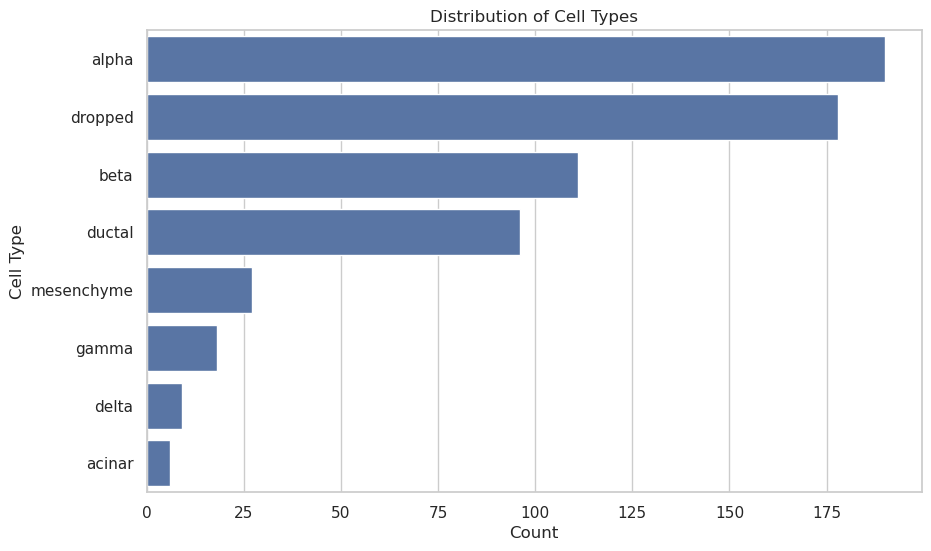

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=adata.obs, y="cell_type1", order=adata.obs['cell_type1'].value_counts().index)
plt.title("Distribution of Cell Types")
plt.xlabel("Count")
plt.ylabel("Cell Type")
plt.show()